# Tweet similarity ranking

### Problem:

1: Use Twitter API to collect 1000 tweets in which keyword ‘narendra modi’ appears, save the collected tweets in nm.txt 

2: Convert the collected tweets into BoW vectors and find cosine similarity of a pair of tweets and print the top-10 most similar tweet pairs, print these pairs

3: Do the same using TF-IDF vectors


## Collect and store the data in nm.csv

In [2]:
import tweepy
import pandas as pd
import numpy as np
import csv

In [3]:
from secrets import *

In [4]:
# Connect twitter API

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
data_path = './data/'

In [5]:
search_words = "narendra modi"
no_of_tweets = 1000

In [6]:
# Ignoring retweets to avoid duplicacy

new_search = "narendra modi -filter:retweets"

In [7]:
tweets = tweepy.Cursor(api.search,
                  q=new_search).items(no_of_tweets)

In [8]:
# Adding tweet text to nm.txt
def text_to_file(tweets, file_name):
    with open(data_path+file_name, "w") as f:
        for tweet in tweets:
            f.write(tweet.text + '\n\n ----------------------\n')

In [13]:
# Convert tweets data into dataframe

text_details = [[tweet.id, tweet.created_at, tweet.user.screen_name, tweet.text] for tweet in tweets]

1000

In [22]:
# Save tweets to csv

with open(data_path + "nm2.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Tweet_id', 'Created At', 'Created By', 'Tweet Text'])
    writer.writerows(text_details)
pass

## Process the stored data

### Convert the collected tweets into BoW vectors and find cosine similarity of a pair of tweets and print the top-10 most similar tweet pairs, print these pairs

In [6]:
# Read data from nm.csv

df = pd.read_csv(data_path+"nm2.csv")

In [7]:
df.shape

(1000, 4)

In [8]:
df.head()

,tweet_id,text,creator_id,created_by
0,1321587869807341569,@jadafromnola @FriedrichPieter What an amazing...,1279132550380654592,BHARATIYASEEKER
1,1321585634440458240,@JoshCastelino Oh rice bag converts you ppl ha...,396353624,RecepErdoggann
2,1321580847825264640,PM Narendra Modi dubs Tejashwi ‘jungle raj ke ...,134758540,timesofindia
3,1321577699861647360,Hindu hi to tha mar gaya \nMaar diya police ne...,1184757165828927488,randm_indianguy
4,1321570785706733568,गरीब के नाम पर राजनीति करने वालों ने देश में ऐ...,1274235804525539328,BhagwanSankla


In [9]:
texts = df["text"]
texts[0]

'@jadafromnola @FriedrichPieter What an amazing quote from Narendra Modi. https://t.co/g29xriaEOx'

In [10]:
# Add text to python list

text_list = []
for text in texts:
    text_list.append(text)

In [11]:
len(text_list)

1000

In [12]:
# tfidf vectorize

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [13]:
T = tfidf_vectorizer.fit_transform(text_list)

In [14]:
len(tfidf_vectorizer.get_feature_names())

4307

In [15]:
T.shape

(1000, 4307)

In [16]:
T = T.toarray()

In [17]:
T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
len(T)

1000

In [19]:
len(T[0])

4307

In [20]:
print(T[0])

[0. 0. 0. ... 0. 0. 0.]


In [21]:
T_df = pd.DataFrame(T, columns = tfidf_vectorizer.get_feature_names())  

In [22]:
T_df.head()

,00000,0_0you_know_who,0auv3vnixt,0cxem7pdlo,0eauaex4sd,0gstvoy8ql,0lky13faai,0qygshhb4l,0rlzovlefn,0t13bwpbbr,...,എന,കറ,ങള,ടത,ണയ,പട,രഞ,രത,ലര,ൽഒ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

tweet_similarity = []

for i in range(len(T)):
    tweet_similarity_row = []
    for j in range(len(T)):
        a = np.reshape(T[i], (1, T[i].size))
        b = np.reshape(T[j], (1, T[j].size))
        c = cosine_similarity(a,b)
        tweet_similarity_row.append(c[0][0])
    tweet_similarity.append(tweet_similarity_row)
    

In [24]:
len(tweet_similarity)

1000

In [25]:
len(tweet_similarity[0])

1000

In [26]:
# Find pair which are most similar (max value in tweet_similarity)

row_col_similarity = []

for i in range(len(T)):
    for j in range(i, len(T)):
        if i != j:
            row_col_similarity.append([i, j, tweet_similarity[i][j]])

In [27]:
len(row_col_similarity)

499500

In [28]:
len(row_col_similarity[0])

3

In [29]:
# Create the pandas DataFrame 
similarity_df = pd.DataFrame(row_col_similarity, columns = ['Tweet1 index', 'Tweet2 index', 'cosine similarity']) 

In [30]:
# Sort in dec order of cosine similarity

top_ten_df = similarity_df.nlargest(10, 'cosine similarity')

In [31]:
top_ten_df.reset_index(drop=True)

,Tweet1 index,Tweet2 index,cosine similarity
0,268,269,1.0
1,92,510,1.0
2,212,398,1.0
3,728,729,1.0
4,728,730,1.0
5,728,731,1.0
6,728,732,1.0
7,728,733,1.0
8,728,734,1.0
9,728,735,1.0


In [32]:
df = pd.read_csv(data_path+"nm.csv")

In [33]:
df.head()

,tweet_id,text,creator_id,created_by
0,1321587869807341569,@jadafromnola @FriedrichPieter What an amazing...,1279132550380654592,BHARATIYASEEKER
1,1321585634440458240,@JoshCastelino Oh rice bag converts you ppl ha...,396353624,RecepErdoggann
2,1321580847825264640,PM Narendra Modi dubs Tejashwi ‘jungle raj ke ...,134758540,timesofindia
3,1321577699861647360,Hindu hi to tha mar gaya \nMaar diya police ne...,1184757165828927488,randm_indianguy
4,1321570785706733568,गरीब के नाम पर राजनीति करने वालों ने देश में ऐ...,1274235804525539328,BhagwanSankla


## Similar tweets pair

In [34]:
for i in range(len(top_ten_df)):
    print("\nTweet pair ", i+1)
    t1 = top_ten_df.iloc[i, 0]
    t2 = top_ten_df.iloc[i, 1] 
    print("Tweet1")
    print(df.iloc[t1, 3])
    print("Tweet2")
    print(df.iloc[t2, 3])
    print("************************************************************")


Tweet pair  1
Tweet1
sarahtweets8t
Tweet2
sarahtweets8t
************************************************************

Tweet pair  2
Tweet1
PatelGiraK2
Tweet2
SunilGu96576773
************************************************************

Tweet pair  3
Tweet1
DimitriCruz5
Tweet2
PTI_News
************************************************************

Tweet pair  4
Tweet1
blan_sera
Tweet2
blan_sera
************************************************************

Tweet pair  5
Tweet1
blan_sera
Tweet2
blan_sera
************************************************************

Tweet pair  6
Tweet1
blan_sera
Tweet2
blan_sera
************************************************************

Tweet pair  7
Tweet1
blan_sera
Tweet2
blan_sera
************************************************************

Tweet pair  8
Tweet1
blan_sera
Tweet2
blan_sera
************************************************************

Tweet pair  9
Tweet1
blan_sera
Tweet2
blan_sera
*****************************************************

 ### The could have been better if duplicate text of tweets were dropped

In [35]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 33 kB/s  eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [36]:
import networkx as nx 
# importing matplotlib.pyplot 
import matplotlib.pyplot as plt

In [42]:
g = nx.DiGraph()

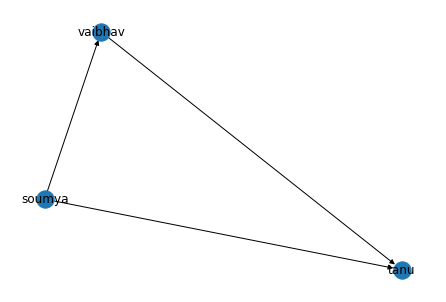

In [44]:
g.add_edge("soumya", "tanu")
g.add_edge("soumya", "vaibhav")
g.add_edge("vaibhav", "tanu")
g.add_edge("vaibhav", "tanu")
nx.draw(g, with_labels = True)

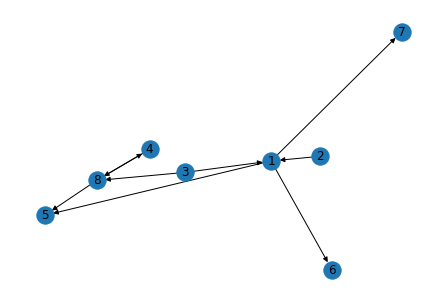

In [68]:
g = nx.DiGraph()
s = [1, 8]
ff = []
a = [1, 2, 3]
b = [5, 6, 7]
ff = [a, b]
ff
gg = []
gg.append(ff)

d = [8, 4, 3]
e = [4, 8, 5]
k = [d, e]
gg.append(k)
user_list = gg
unique_creators = s
for i in range(len(user_list)):
    for j in range(len(user_list[i][0])):
        g.add_edge(user_list[i][0][j], unique_creators[i])
    
    for k in range(len(user_list[i][1])):
        g.add_edge(unique_creators[i], user_list[i][1][k])
        
nx.draw(g, with_labels = True)

Find popular users in this G based on

Degree centrality

Betweeness centrality

Closeness centrality

In [69]:
nx.degree_centrality(g)

{1: 1.0,
 2: 0.14285714285714285,
 3: 0.2857142857142857,
 4: 0.2857142857142857,
 5: 0.2857142857142857,
 6: 0.14285714285714285,
 7: 0.14285714285714285,
 8: 0.8571428571428571}